In [1]:


import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt





In [2]:
data = pd.read_csv('/kaggle/input/mnist-digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:

data = np.array(data)        # Convert dataframe to numpy array
m, n = data.shape            # m = number of examples, n = features + label
np.random.shuffle(data)      # Shuffle rows to randomize data order

data_dev = data[0:1000].T    # Take first 1000 examples for dev set, transpose
Y_dev = data_dev[0]          # First row = labels for dev set
X_dev = data_dev[1:n]        # Remaining rows = features for dev set

data_train = data[1000:m].T  # Take remaining examples for training, transpose
Y_train = data_train[0]      # First row = labels for training set
X_train = data_train[1:n]    # Remaining rows = features for training set





In [5]:
X_train = X_train / 255.0
X_dev = X_dev / 255.0        # Normalize pixel values from 0-255 range to 0-1 range

In [6]:
X_train[:, 0].shape

(784,)

In [7]:
# Initialize the weights and biases for our 2-layer neural network
 #   - Layer 1: 784 inputs -> 10 neurons (hidden layer)
  #  - Layer 2: 10 inputs -> 10 neurons (output layer for 10 digits)

def init_params():
    W1 = np.random.randn(10, 784)*0.1 ## Weights from input to hidden layer
    b1 = np.zeros((10, 1)) # Biases for hidden layer
    W2 = np.random.randn(10, 10) *0.1 ## Weights from hidden to output layer
    b2 = np.zeros((10,1)) # Biases for output layer
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0) # Adds non-linearity to our network to help it learn better

def softmax(Z): #softmax for getting probabilities from raw scores
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # prevents overflow
    return expZ / np.sum(expZ, axis=0, keepdims=True)
    
def forward_prop(W1, b1, W2, b2, X): # for getting predictions from input data
    #Hidden layer calculations ,RelU used as activation fn
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    #output layer calculations,softmax for prob distributions
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z): #derivative used for backpropagation
    return (Z > 0).astype(float)

def one_hot(Y): #converts labels to one-hot encoding,needed for calculation of loss with softmax output
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

#backward prop for calculating gradients and to update weights and biases
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]                      
    one_hot_Y = one_hot(Y)
    
    # Calculate gradients for output layer (Layer 2)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    # Calculate gradients for hidden layer (Layer 1) using chain rule
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

# Main training fn(forward prop->backward prop->parameter update for specified iterations)
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [9]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.5, iterations=500)


Iteration:  0
0.1165609756097561
Iteration:  50
0.8058780487804879
Iteration:  100
0.89
Iteration:  150
0.9016585365853659
Iteration:  200
0.9102439024390244
Iteration:  250
0.9100731707317073
Iteration:  300
0.9188780487804878
Iteration:  350
0.8969756097560976
Iteration:  400
0.924219512195122
Iteration:  450
0.9260243902439025


In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


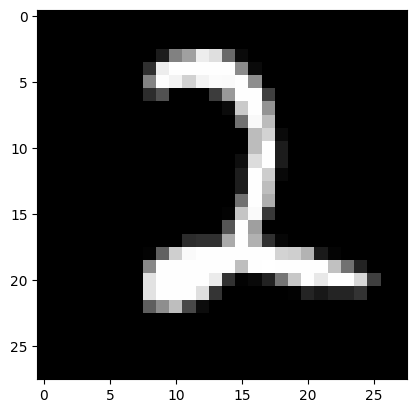

Prediction:  [8]
Label:  8


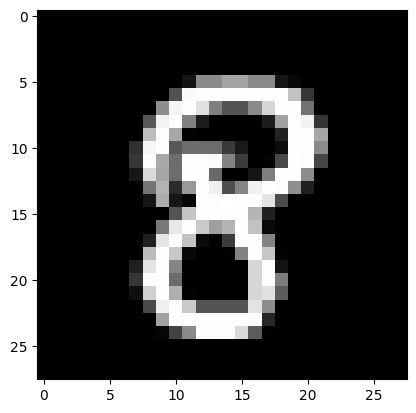

Prediction:  [0]
Label:  0


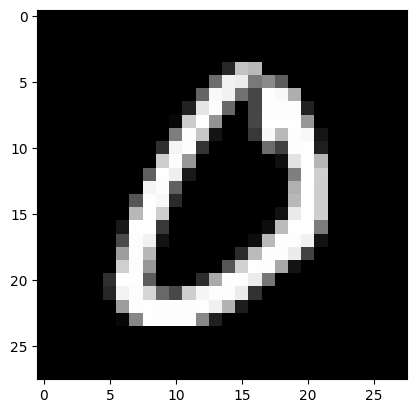

Prediction:  [4]
Label:  2


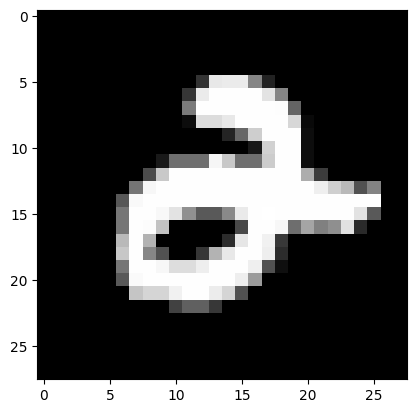

In [11]:
#testing on few training examples
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [13]:
#test on validation set to see how well it performs
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("Dev accuracy:", get_accuracy(dev_predictions, Y_dev))


Dev accuracy: 0.94
